In [2]:
import pandas as pd
import numpy as np

In [3]:
health_data = pd.read_csv('국민건강보험공단_건강검진정보_20221231.CSV' , encoding= 'cp949')
health_data2 = health_data.copy()

In [4]:
#row 가 몇개인지 확인해보기 
health_data2.shape

(1000000, 30)

In [5]:
health_data2.describe()
health_data2 = health_data2.drop(columns= '시도코드')

In [6]:
health_data2['테스트'] = -1
health_data2= health_data2.drop(columns='테스트')

In [7]:
health_data2.head()

,기준년도,가입자일련번호,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,2,14,160,75,89.0,1.0,1.0,1.0,...,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,2,9,150,45,68.0,1.0,1.0,1.0,...,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,2,13,150,60,78.8,1.0,1.0,1.0,...,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,2,6,160,50,69.0,1.0,1.0,1.0,...,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,2,7,160,55,75.0,1.0,1.0,1.0,...,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN


In [8]:
health_data2['기준년도'][0] = 2022

/var/folders/9g/6l4kllks7p76ksrkbq5gc8tr0000gn/T/ipykernel_4324/1598206201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_data2['기준년도'][0] = 2022


In [9]:
health_data2.count(axis=1) #nan 이 아닌 원소의 개수를 셈

0         23
1         23
2         23
3         23
4         23
          ..
999995    29
999996    27
999997    27
999998    29
999999    27
Length: 1000000, dtype: int64

In [56]:
control = health_data2.loc[:, ['수축기혈압',  '총콜레스테롤',  '성별']]
variant = health_data2.loc[:, ['수축기혈압', '총콜레스테롤', '성별']]

In [57]:
control['type'] = 'control'
variant['type'] = 'variant'

In [58]:
data = pd.concat([control , variant])

In [13]:
data.dropna().shape[0]

691222

In [59]:
data.head()

,수축기혈압,총콜레스테롤,성별,type
0,127.0,NaN,2,control
1,127.0,NaN,2,control
2,135.0,NaN,2,control
3,109.0,NaN,2,control
4,110.0,NaN,2,control


In [15]:
data.type.unique()

array(['control', 'variant'], dtype=object)

In [16]:
data['type'].where(data['type'] == 'control')

0         control
1         control
2         control
3         control
4         control
           ...   
999995        NaN
999996        NaN
999997        NaN
999998        NaN
999999        NaN
Name: type, Length: 2000000, dtype: object

In [17]:
data.loc[data.성별 ==2]
data.query('성별 > 1')

,수축기혈압,총콜레스테롤,성별,type
0,127.0,NaN,2,control
1,127.0,NaN,2,control
2,135.0,NaN,2,control
3,109.0,NaN,2,control
4,110.0,NaN,2,control
...,...,...,...,...
999989,124.0,149.0,2,variant
999991,121.0,215.0,2,variant
999993,116.0,151.0,2,variant
999996,136.0,240.0,2,variant


In [18]:
data.filter(items=['성별','type'])

,성별,type
0,2,control
1,2,control
2,2,control
3,2,control
4,2,control
...,...,...
999995,1,variant
999996,2,variant
999997,1,variant
999998,1,variant


In [19]:
data

,수축기혈압,총콜레스테롤,성별,type
0,127.0,NaN,2,control
1,127.0,NaN,2,control
2,135.0,NaN,2,control
3,109.0,NaN,2,control
4,110.0,NaN,2,control
...,...,...,...,...
999995,128.0,245.0,1,variant
999996,136.0,240.0,2,variant
999997,119.0,205.0,1,variant
999998,109.0,178.0,1,variant


In [20]:
data.drop(0)
data.drop(columns=['성별'])

,수축기혈압,총콜레스테롤,type
0,127.0,NaN,control
1,127.0,NaN,control
2,135.0,NaN,control
3,109.0,NaN,control
4,110.0,NaN,control
...,...,...,...
999995,128.0,245.0,variant
999996,136.0,240.0,variant
999997,119.0,205.0,variant
999998,109.0,178.0,variant


In [21]:
data.loc[:, ['수축기혈압','총콜레스테롤']].rank()

,수축기혈압,총콜레스테롤
0,1224312.5,NaN
1,1224312.5,NaN
2,1592489.5,NaN
3,300992.5,NaN
4,363959.5,NaN
...,...,...
999995,1267077.5,602560.5
999996,1630635.5,585522.5
999997,798606.5,401550.5
999998,300992.5,224528.5


In [22]:
rnk = data.loc[:, ['수축기혈압','총콜레스테롤']].rank()

rnk.query('수축기혈압 < 2')

,수축기혈압,총콜레스테롤
37206,1.5,NaN
37206,1.5,NaN


In [23]:
data.loc[:, ['수축기혈압','총콜레스테롤']].quantile(0.1)

수축기혈압     105.0
총콜레스테롤    145.0
Name: 0.1, dtype: float64

In [24]:
data = data.loc[:, ['수축기혈압','총콜레스테롤', 'type']] 

In [25]:
data.groupby(['type']).agg(['min', 'max'])

수축기혈압        총콜레스테롤        
          min    max    min     max
type                               
control  54.0  269.0   42.0  2176.0
variant  54.0  269.0   42.0  2176.0

In [27]:
control = health_data2.loc[:, ['수축기혈압',  '총콜레스테롤',  '성별']]
variant = health_data2.loc[:, ['수축기혈압', '총콜레스테롤', '성별']]

In [31]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [33]:
df1.head()

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [35]:
df2.head()

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [37]:
df1.merge(df2 , left_on = 'lkey' , right_on = 'rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [40]:
data = {
    '학생1': [[90, 85, 80, 75, 70]],
    '학생2': [[95, 80, 70, 80, 95]],
    '학생3': [[85, 95, 90, 70, 85]],
}
df = pd.DataFrame(data)

In [42]:
df.head()

,학생1,학생2,학생3
0,"[90, 85, 80, 75, 70]","[95, 80, 70, 80, 95]","[85, 95, 90, 70, 85]"


In [44]:
df.explode(['학생1', '학생2' , '학생3'])

,학생1,학생2,학생3
0,90,95,85
0,85,80,95
0,80,70,90
0,75,80,70
0,70,95,85


In [45]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [48]:
df.pivot(index = 'foo', columns = 'bar')

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [50]:
data = {
  'A': {0: 'a', 1: 'b', 2: 'c'},
  'B': {0: 1, 1: 3, 2: 5},
  'C': {0: 2, 1: 4, 2: 6}
  }
df = pd.DataFrame(data)

df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [52]:
df.melt(id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [68]:
data.drop(columns=['type']).rename(columns = {'총콜레스테롤':'control'}).melt(id_vars=['성별'], value_vars=['control'])

,성별,variable,value
0,2,control,NaN
1,2,control,NaN
2,2,control,NaN
3,2,control,NaN
4,2,control,NaN
...,...,...,...
1999995,1,control,245.0
1999996,2,control,240.0
1999997,1,control,205.0
1999998,1,control,178.0


In [66]:
data.drop(columns=['type']).rename(columns = {'총콜레스테롤':'control'})

,수축기혈압,control,성별
0,127.0,NaN,2
1,127.0,NaN,2
2,135.0,NaN,2
3,109.0,NaN,2
4,110.0,NaN,2
...,...,...,...
999995,128.0,245.0,1
999996,136.0,240.0,2
999997,119.0,205.0,1
999998,109.0,178.0,1


In [70]:
data.head()

,수축기혈압,총콜레스테롤,성별,type
0,127.0,NaN,2,control
1,127.0,NaN,2,control
2,135.0,NaN,2,control
3,109.0,NaN,2,control
4,110.0,NaN,2,control


In [80]:
data.stack()

0       수축기혈압       127.0
        성별              2
        type      control
1       수축기혈압       127.0
        성별              2
                   ...   
999998  type      variant
999999  수축기혈압       137.0
        총콜레스테롤      170.0
        성별              2
        type      variant
Length: 6680124, dtype: object

In [82]:
pd.date_range('2024-06-01', '2024-06-30', freq='B')

DatetimeIndex(['2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06',
               '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14', '2024-06-17', '2024-06-18',
               '2024-06-19', '2024-06-20', '2024-06-21', '2024-06-24',
               '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28'],
              dtype='datetime64[ns]', freq='B')

In [83]:
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-01-05"))

In [87]:
df.head()

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [95]:
df['lag'] = df.Col1.shift(-1)

df

,Col1,Col2,Col3,lag
2020-01-01,10,13,17,20.0
2020-01-02,20,23,27,15.0
2020-01-03,15,18,22,30.0
2020-01-04,30,33,37,45.0
2020-01-05,45,48,52,NaN


<Axes: >

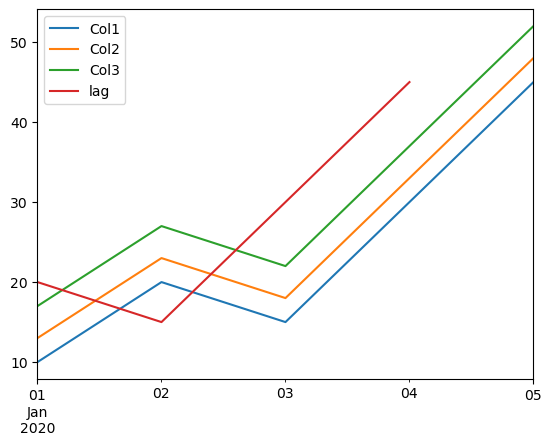

In [103]:
df.plot()

<Axes: >

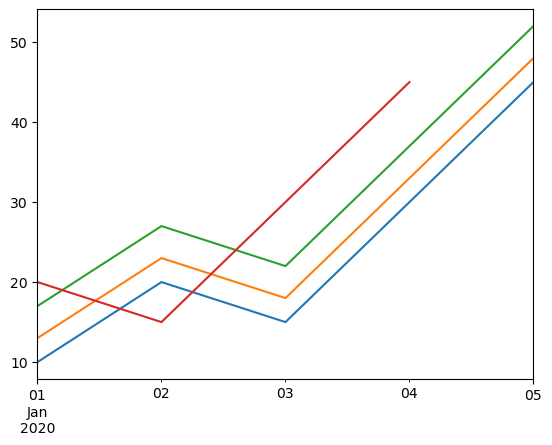

In [105]:
df.plot(legend=False)

<Axes: >

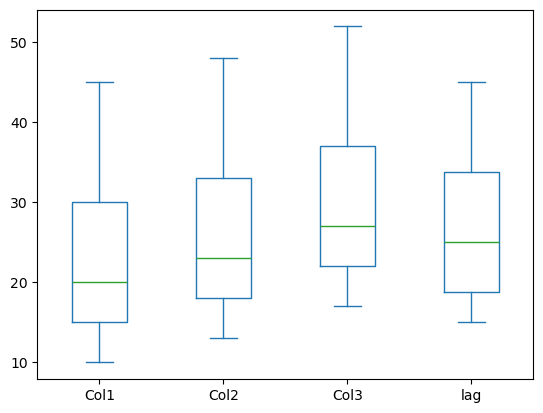

In [108]:
df.plot(kind='box')

<Axes: ylabel='Density'>

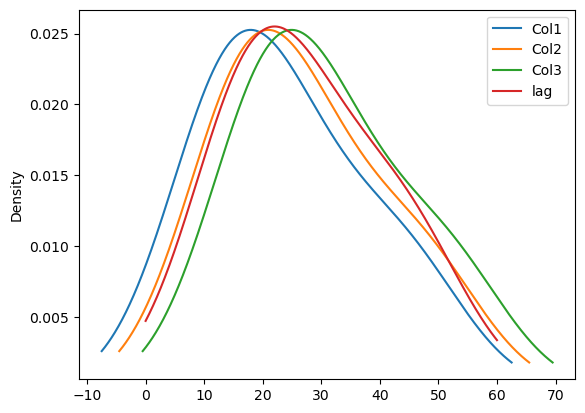

In [109]:
df.plot(kind='density')

In [154]:
df.plot(kind='pie' , subplots=True) ##subplots 가 뭐지 

ValueError: pie plot doesn't allow negative values

In [146]:
health_data = pd.read_csv('국민건강보험공단_건강검진정보_20221231.CSV' , encoding= 'cp949') 
# 'cp949' / 'utf-16'/ 'euc-kr'

In [115]:
health_data.shape

(1000000, 30)

In [127]:
sample = (health_data.isna().sum()) / (len(health_data)) * 100
sample = sample.to_frame()

In [140]:
sample.rename(columns={0 : 'na_pct'}).head()

,na_pct
기준년도,0.0
가입자일련번호,0.0
시도코드,0.0
성별,0.0
연령대코드(5세단위),0.0


In [144]:
sample = sample.sort_values(by=['na_pct'], ascending=False)

In [148]:
sample

,na_pct
LDL콜레스테롤,66.0926
치아우식증유무,65.5671
치석,65.5670
트리글리세라이드,65.4386
HDL콜레스테롤,65.4386
총콜레스테롤,65.4382
요단백,1.1054
혈색소,0.5616
혈청크레아티닌,0.5615
혈청지오티(AST),0.5613


In [151]:
health_data.dropna(subset=['치석']) #치석이 nan인애만 떨어짐

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
18435,2022,443680,41,2,7,155,60,80.0,1.0,1.2,...,1.0,0.8,18.0,12.0,8.0,1.0,0.0,1,0.0,1.0
18440,2022,4889777,41,1,8,170,80,85.0,1.0,1.5,...,1.0,0.8,20.0,22.0,52.0,2.0,1.0,1,1.0,1.0
18441,2022,2907679,41,1,14,165,60,85.0,0.5,0.9,...,1.0,0.8,26.0,19.0,24.0,1.0,1.0,1,0.0,1.0
18442,2022,4631243,41,1,8,170,70,85.0,1.0,0.5,...,1.0,0.8,20.0,13.0,33.0,1.0,1.0,1,0.0,0.0
18443,2022,1173218,41,1,6,185,85,85.0,0.2,1.2,...,1.0,0.8,46.0,62.0,49.0,3.0,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,2022,3846447,41,1,8,180,85,84.9,1.0,1.0,...,1.0,0.8,43.0,34.0,13.0,1.0,1.0,1,0.0,1.0
999993,2022,4777440,48,2,14,150,70,96.4,0.9,1.2,...,1.0,0.8,48.0,49.0,17.0,1.0,0.0,1,0.0,0.0
999994,2022,182319,28,1,14,165,105,109.1,0.7,0.8,...,1.0,1.1,79.0,55.0,99.0,2.0,1.0,1,0.0,0.0
999995,2022,2134210,43,1,6,170,90,98.8,1.2,1.2,...,1.0,0.9,95.0,251.0,77.0,1.0,1.0,1,0.0,0.0


In [167]:
for i in range(1, 12):
    for j in range(1,12):
        print(f'{i: 2d} x {j: 3d} = {i*j: 4d}') #출력 예쁘게 해줌 
    print()

 1 x   1 =    1
 1 x   2 =    2
 1 x   3 =    3
 1 x   4 =    4
 1 x   5 =    5
 1 x   6 =    6
 1 x   7 =    7
 1 x   8 =    8
 1 x   9 =    9
 1 x  10 =   10
 1 x  11 =   11

 2 x   1 =    2
 2 x   2 =    4
 2 x   3 =    6
 2 x   4 =    8
 2 x   5 =   10
 2 x   6 =   12
 2 x   7 =   14
 2 x   8 =   16
 2 x   9 =   18
 2 x  10 =   20
 2 x  11 =   22

 3 x   1 =    3
 3 x   2 =    6
 3 x   3 =    9
 3 x   4 =   12
 3 x   5 =   15
 3 x   6 =   18
 3 x   7 =   21
 3 x   8 =   24
 3 x   9 =   27
 3 x  10 =   30
 3 x  11 =   33

 4 x   1 =    4
 4 x   2 =    8
 4 x   3 =   12
 4 x   4 =   16
 4 x   5 =   20
 4 x   6 =   24
 4 x   7 =   28
 4 x   8 =   32
 4 x   9 =   36
 4 x  10 =   40
 4 x  11 =   44

 5 x   1 =    5
 5 x   2 =   10
 5 x   3 =   15
 5 x   4 =   20
 5 x   5 =   25
 5 x   6 =   30
 5 x   7 =   35
 5 x   8 =   40
 5 x   9 =   45
 5 x  10 =   50
 5 x  11 =   55

 6 x   1 =    6
 6 x   2 =   12
 6 x   3 =   18
 6 x   4 =   24
 6 x   5 =   30
 6 x   6 =   36
 6 x   7 =   42
 6 

In [ ]:
# 1*1 2*1 3*1 
# 1*2 2*2 
# 1*3 
# 1*4 

# 이런식으로 출력되도록 해보기 

In [168]:
health_data.head()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,...,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,...,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,...,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,...,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,...,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN


In [179]:
F = len(health_data.query('성별 == 2'))
M = len(health_data.query('성별 == 1'))

In [190]:
data = []

data.append(M)
data.append(F)

In [193]:
data

[515301, 484699]

In [195]:
import matplotlib.pyplot as plt

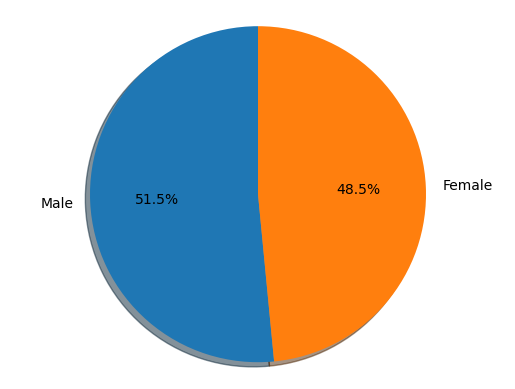

In [198]:
labels = 'Male' , 'Female'

fig, ax = plt.subplots()
ax.pie(
  data, 
  labels=labels, 
  autopct='%1.1f%%',
  shadow=True, 
  startangle=90
  )
ax.axis('equal') 

plt.show()


KeyError: '신장'

0         160
1         150
2         150
3         160
4         160
         ... 
999995    170
999996    150
999997    165
999998    175
999999    150
Name: 신장(5cm단위), Length: 1000000, dtype: int64

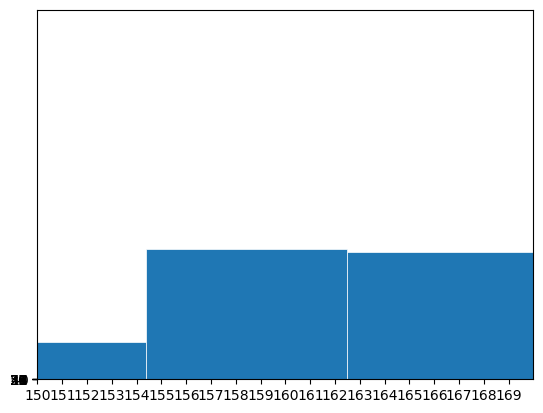

In [214]:
fig, ax = plt.subplots()

ax.hist(data, bins=8, linewidth=0.5, edgecolor="white")

ax.set(
  xlim=(150, 170), xticks=np.arange(150, 170),
  ylim=(0, 1000000), yticks=np.linspace(0, 56, 9))

plt.show()

In [ ]:
성별을 barplot 이랑 , 흡연상태에 따른 혈정지피티의 분포 

In [242]:
a = health_data.성별.value_counts().index
b = health_data.성별.value_counts().values

In [247]:
sample = pd.DataFrame({'cnt': b, '성별': a})
sample

,cnt,성별
0,515301,1
1,484699,2


In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')

In [246]:
sample = sample.reset_index()

In [241]:
sample

,성별,cnt
0,1,515301
1,2,484699


<Axes: xlabel='성별', ylabel='cnt'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


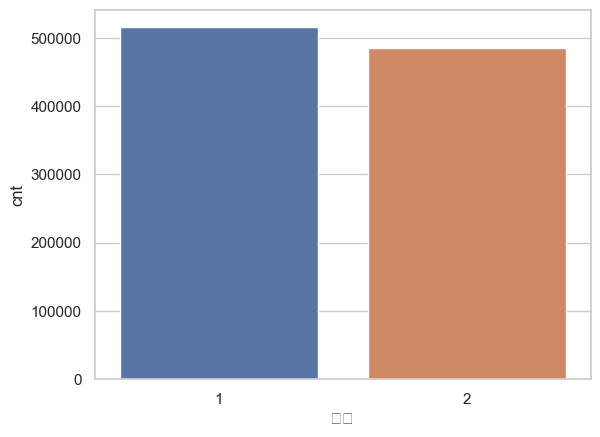

In [248]:
sns.barplot(
    data = sample,
    x = '성별',
    y = 'cnt',
)

<Axes: xlabel='흡연상태', ylabel='혈청지피티(ALT)'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missin

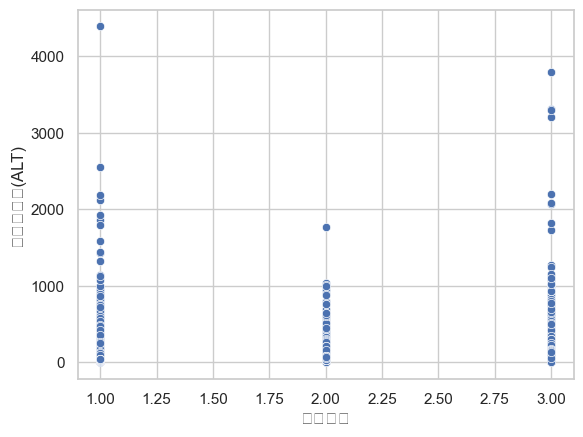

In [250]:
sns.scatterplot(
    data = health_data,
    x = '흡연상태',
    y = '혈청지피티(ALT)'
)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: G

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing fro

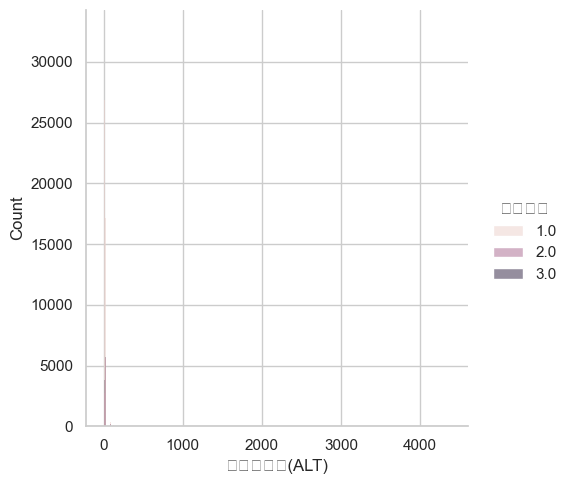

In [252]:
sns.displot(health_data , x='혈청지피티(ALT)', hue = '흡연상태')